#Star Wars character recommendation system for new storylines



## Autores

*   Jesús Casasnovas Garde
*   Daniel González Lopes
*   José María Martínez Penedo
*   Raúl Varandela Marra

## Grupo: **ABP3_viva_HAE**

#Introducción
Nuestro objetivo es desarrollar un sistema que, en base a las descripciones y biografías de Star Wars (principalmente de la [Wookieepedia](https://starwars.fandom.com/wiki/Portada) [1]), nos permita encontrar personajes similares. Al seleccionar un determinado personaje el sistema generará una lista de los personajes ordenados de mayor a menor similitud.

Se incluirán además campos como el género, color de pelo, ojos y piel para poder ajustar el algoritmo de recomendación a la especificaciones de los directivos de Disney, ponderando estas características a la hora de realizar recomendaciones.

#SPRINT 2

En este sprint realizamos la carga de los datos para su posterior uso y un ejemplo de CRUD asociado a la carga de datos.

Todos los ficheros que utilizamos en el proyecto están disponibles en este [enlace](https://github.com/jmpenedo/abp_star_wars) [17]. 

Para simplificar su proceso de cargar en el entorno de ejecución definimos la siguiente función que nos permite tenerlos disponibles.

In [ ]:
#carga de ficheros usados en el proyecto desde Github
import urllib

def carga_URL(la_url,elfichero):
  c_url = la_url + urllib.parse.quote(elfichero)
  print("Descargando :" + c_url);
  filename, headers = urllib.request.urlretrieve(c_url, filename=elfichero)
  print ("Descarga completa!")

In [ ]:
#url donde están los distintos archivos usados
url="https://github.com/jmpenedo/abp_star_wars/raw/master/"

## Formateo de los datos
Uno de los primeros pasos que tenemos que hacer es darle forma al archivo data.xml. Este archivo contiene los personajes obtenidos de la [Wookieepedia](https://starwars.fandom.com/wiki/Main_Page) [1]; pero su formato no es el que nos interesa, por lo que con este fragmento de código recuperamos la biografía, el nombre, el genero, la especie y el color de ojos de los personajes. Al final imprimimos el numero de personajes que hemos extraido del xml.

In [ ]:
#Cargamos desde nuestro repositorio de Github el archivo
carga_URL(url,"data.xml")

Descargando :https://github.com/jmpenedo/abp_star_wars/raw/master/data.xml
Descarga completa!


In [ ]:
import re

characters = []
count = -1
with open ("data.xml", "r") as myfile:
    data=myfile.read().splitlines() 

    description = False
    for line in data:
        if "==Biography==" in line:
            description = True
            continue
        if "==" in line:
            description = False
        if description == True:
            current = characters[count].get("description","")
            characters[count]["description"] = current + line
        if "<title>" in line:
            count += 1
            characters.append({})
            characters[count]["name"]=line[11:-8]
        if "|gender=" in line:
            if line[8:] and line[8:] != "|gender=":
                try:
                    characters[count]["gender"] = re.findall("\|.*?]]",line[8:])[0][1:-2]
                except:
                    characters[count]["gender"] = "NaN"
            else:
                characters[count]["gender"] = "NaN"
        if "|species=" in line:
            if line[8:] and line[8:] != "|species=":
                try:
                    characters[count]["species"] = re.findall("\|.*?]]",line[8:])[0][1:-2]
                except:
                    characters[count]["species"] = "NaN"
            else:
                characters[count]["species"] = "NaN"
        if "|eyes=" in line:
            if line[5:] and line[5:] != "|eyes=":
                try:
                    characters[count]["eye_color"] = re.findall("\|.*?]]",line[8:])[0][1:-2]
                except:
                    characters[count]["eye_color"] = "NaN"
            else:
                characters[count]["eye_color"] = "NaN"

print(len(characters))

7560


## Añadiendo los personajes principales

Pese que los datos obtenidos de la Wookipeedia contienen personajes de los cuales uno nunca ha oido hablar, ironicamente no contiene los principales de la saga, por lo que en este apartado añadidos desde un csv dichos personajes.

In [ ]:
#Cargamos desde nuestro repositorio de Github el archivo
carga_URL(url,"characters.csv")

Descargando :https://github.com/jmpenedo/abp_star_wars/raw/master/characters.csv
Descarga completa!


In [ ]:
from google.colab import files
 
import pandas as pd
 
personajes = pd.read_csv("characters.csv", encoding= 'unicode_escape')
 
personajes = personajes[['name', 'hair_color',
                             'skin_color', 'eye_color', 'birth_year',
                             'gender', 'species', 'description']]

personajes.drop(['hair_color','skin_color', 'birth_year'], axis='columns', inplace=True)
 
df = pd.DataFrame(personajes)
  
df.to_csv ('personajes.csv', index = False)
 
pd.read_csv('personajes.csv')

,name,eye_color,gender,species,description
0,Luke Skywalker,blue,male,Human,"Luke Skywalker, a Force-sensitive human male, ..."
1,C-3PO,yellow,NaN,Droid,"C-3PO, sometimes spelled See-Threepio and ofte..."
2,R2-D2,red,NaN,Droid,"R2-D2, pronounced Artoo-Deetoo and often refer..."
3,Darth Vader,yellow,male,Human,Anakin Skywalker was a Force-sensitive Human m...
4,Leia Organa,brown,female,Human,Leia Skywalker Organa Solo was a Force-sensiti...
...,...,...,...,...,...
84,BB8,black,none,Droid,"BB-8, sometimes spelled and pronounced Beebee-..."
85,Captain Phasma,blue,female,NaN,Phasma was a human female stormtrooper captain...
86,Padmé Amidala,brown,female,Human,"Padmé Amidala, also known as Padmé Amidala Nab..."
87,Din Djarin,brown,male,Human,"Din Djarin, commonly known as ""the Mandalorian..."


## Juntando todos los personajes

Una vez que tenemos los personajes principales cargados, vamos a añadirle el resto de la fauma de la galaxia, pero solo si tienen descripción; ya que de lo contrario no nos servirá para el futuro recomendador de personajes.

In [ ]:
for character in characters:
    if character.get("description"):
        df=df.append(character,ignore_index=True,sort=False)    
df


,name,eye_color,gender,species,description
0,Luke Skywalker,blue,male,Human,"Luke Skywalker, a Force-sensitive human male, ..."
1,C-3PO,yellow,NaN,Droid,"C-3PO, sometimes spelled See-Threepio and ofte..."
2,R2-D2,red,NaN,Droid,"R2-D2, pronounced Artoo-Deetoo and often refer..."
3,Darth Vader,yellow,male,Human,Anakin Skywalker was a Force-sensitive Human m...
4,Leia Organa,brown,female,Human,Leia Skywalker Organa Solo was a Force-sensiti...
...,...,...,...,...,...
1780,Lomi Plo,NaN,Female,Human,Lomi Plo was a [[Nightsisters/Legends|Nightsis...
1781,Jocasta Nu/Legends,NaN,Female,Human,{{Quote|There is more knowledge here than anyw...
1782,Ur-Sema Du,NaN,Female,Human,[[File:Ursemadu.jpg|thumb|left|Ur-Sema Du and ...
1783,Rhalia Jinsari,NaN,Female,Zabrak,{{Quote|The bounty hunter's name is Rhalia Jin...


Una vez que los tenemos todos juntos, exportamos el dataframe a csv y lo descargamos.

In [ ]:
df.to_csv ('personajes_full.csv', index = False)
files.download('personajes_full.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Ejemplo CRUD

Pues una vez que tenemos un dataframe completo con el que trabajar, vamos a realizar un pequeño ejemplo de crear, leer, actualizar y borrar personajes.

Primero de todo vamos a añadir un nuevo personaje.

In [ ]:
append_row = {'name': "Ahsoka Tano",'eye_color': "blue" ,'gender': "female" ,'species':"Togruta" ,'description': "Ahsoka Tano was a former Jedi Padawan who, after the Clone Wars, helped establish a network of various rebel cells against the Galactic Empire. A Togruta female, Tano was discovered on her homeworld of Shili by Jedi Master Plo Koon, who brought her to the Jedi Temple on Coruscant to receive Jedi training. Following the outbreak of the Clone Wars, Jedi Grand Master Yoda assigned the young Tano to be the Padawan learner of Jedi Knight Anakin Skywalker, who nicknamed her Snips when she joined him at the Battle of Christophsis. Whereas Tano was eager to prove herself, Skywalker had a reputation for recklessness, and they had a rather difficult start as master and apprentice. Yet they worked together to rescue Rotta, the son of crime lord Jabba Desilijic Tiure, and returned Rotta to his father, thus facilitating a crucial alliance between the Hutt Clan and the Galactic Republic.As a commander in the Grand Army of the Republic, Tano found a mentor in Clone Captain Rex of the 501st Legion, with whom she and Skywalker collaborated to lead frontline campaigns against the Confederacy of Independent Systems. In her first command position at the Battle of Ryloth, Tano disobeyed orders and lost her entire squadron of pilots, but she rebounded and helped secure a victory at Ryloth. Her assignments pitted her against a variety of opponents, from General Grievous and Sith apprentice Asajj Ventress to bounty hunters such as Cad Bane and Aurra Sing. Over time, she matured into a respected leader, contributing to key Republic victories like the Second Battle of Geonosis and the Battle of Mon Cala. She even died during a series of events on Mortis, but the Daughter, a Force wielder who personified the light side, sacrificed herself to bring Tano back to life.Tano gained much experience on and beyond the war front, leading a group of Jedi younglings to revolt against their Trandoshan captors, helping rescue a colony of Togruta from enslavement by the Zygerrian Slave Empire, and serving as an advisor to the Onderon rebels—with her close friend, Lux Bonteri, among them—as they liberated their world from the Confederacy. In a stark turn of events, Tano was framed for the bombing of the Jedi Temple hangar and other homicides, and she escaped into the Coruscant underworld to clear her name. Though she formed an unlikely alliance with Asajj Ventress, she was detained by Republic forces and was consequently barred from the Jedi Order. Ultimately, Skywalker uncovered the true culprit, Tano's friend, and fellow Padawan Barriss Offee, and prevented his former apprentice from being convicted of sedition. Nevertheless, the ordeal dislodged Tano's faith in the Jedi. She refused the Jedi High Council's offer to rejoin the Order, instead of departing in search of a new path and becoming a Force-Sensitive Outcast. Tano briefly returned to lead Republic forces during the Siege of Mandalore and faced Maul and his forces, although Order 66 was enacted shortly after the Sith Lord's capture and Tano, faking her death after being betrayed by the 501st Legion, was forced into hiding.After the Galactic Empire came to power, Tano went into hiding on Thabeska and Raada disguised as Ashla. Following the evacuation of Raada, Tano joined Senator Bail Organa's growing rebel movement. She became the manager of his intelligence network and adopted the codename Fulcrum. As Fulcrum, Tano provided intelligence to various rebel factions including Hera Syndulla's Spectres rebel cell. Tano took a particular interest in Syndulla's rebels because one of their members, a former Jedi named Kanan Jarrus, had begun to train his own Padawan, Ezra Bridger. In addition, Tano's efforts against the Empire brought her into contact with the Dark Lord of the Sith Darth Vader—who, unknown to her, was actually her former master, Anakin Skywalker—as well as the Imperial Inquisitors known as the Fifth Brother and the Seventh Sister. Following the mission to Malachor, Tano became lost to the rubble and shadows of the Sith temple and was believed by many, including Jarrus and Bridger, to have perished during a duel with Darth Vader. However, Tano was unexpectedly saved from Vader's wrath by a future Ezra Bridger, who pulled her through a portal into the World Between Worlds, a dimension of the Force connecting all time and space. After a confrontation with Darth Sidious, who desired access to the dimension, Tano returned to her time, promising Bridger that she would find him once she returned. After the end of the Galactic Civil War, Tano returned to a freed Lothal and joined Sabine Wren in her quest to find a missing Bridger, who had disappeared during the Liberation of Lothal.Decades after Tano began her search, her voice joined a multitude of Jedi spirits to guide the young Jedi Rey during the final battle of the First Order–Resistance war. Ahsoka inspired Rey to stand up to a resurrected Darth Sidious and destroy him once and for all." }
df=df.append(append_row,ignore_index=True,sort=False)

Una vez añadido el personaje, vamos a visualizar este nuevo personaje añadido

In [ ]:
df.loc[df['name'] == 'Ahsoka Tano']

,name,eye_color,gender,species,description,processed_text,atributos
1785,Ahsoka Tano,blue,female,Togruta,"Ahsoka Tano was a former Jedi Padawan who, aft...",NaN,NaN


A continuación vamos a eliminar uno de los personajes más odiados de toda la saga, *Jar Jar Binks*. Para ello, primero vamos a comprobar que está en el dataframe.

In [ ]:
temp = df.loc[df['name'] == 'Jar Jar Binks']
temp


,name,eye_color,gender,species,description,processed_text,atributos
33,Jar Jar Binks,orange,male,Gungan,Jar Jar Binks was a Gungan male military comma...,jar jar bink gungan male militari command poli...,orange male gungan


Y ahora lo eliminamos.

In [ ]:
df = df.drop(temp.index)

Para completar el ejemplo nos queda actualizar un personaje. Para ello vamos a cambiar el nombre a C-3PO por C3PO.

In [ ]:
df.at[1,'name']=' C3PO'

df.head(5)

,name,eye_color,gender,species,description
0,Luke Skywalker,blue,male,Human,"Luke Skywalker, a Force-sensitive human male, ..."
1,C3PO,yellow,NaN,Droid,"C-3PO, sometimes spelled See-Threepio and ofte..."
2,R2-D2,red,NaN,Droid,"R2-D2, pronounced Artoo-Deetoo and often refer..."
3,Darth Vader,yellow,male,Human,Anakin Skywalker was a Force-sensitive Human m...
4,Leia Organa,brown,female,Human,Leia Skywalker Organa Solo was a Force-sensiti...


Recargamos el Dataframe de nuevo para seguir con el proceso de generar recomendaciones.

In [ ]:
#Cargamos desde nuestro repositorio de Github el archivo (en caso de no ternerlo ya)
carga_URL(url,"personajes_full.csv")

Descargando :https://github.com/jmpenedo/abp_star_wars/raw/master/personajes_full.csv
Descarga completa!


In [ ]:

from google.colab import files
 
import pandas as pd
personajes = pd.read_csv("personajes_full.csv", encoding= 'unicode_escape')
df = pd.DataFrame(personajes)
df.head(5)

,name,eye_color,gender,species,description
0,Luke Skywalker,blue,male,Human,"Luke Skywalker, a Force-sensitive human male, ..."
1,C-3PO,yellow,NaN,Droid,"C-3PO, sometimes spelled See-Threepio and ofte..."
2,R2-D2,red,NaN,Droid,"R2-D2, pronounced Artoo-Deetoo and often refer..."
3,Darth Vader,yellow,male,Human,Anakin Skywalker was a Force-sensitive Human m...
4,Leia Organa,brown,female,Human,Leia Skywalker Organa Solo was a Force-sensiti...


#SPRINT 3
Una vez que tenemos los datos cargados, en este sprint se desarrolló el sistema de recomendación.

## Sistema de Recomendación

Antes de empezar con el sistema de recomendación tenemos que hacer un preprocesamiento de las descripciones de cada personaje, para ello vamos a hacer lo siguiente:

- Divir el texto en palabras, lo que se conoce como ***tokenization***. Esto es necesario para poder realizar un procesado textual de forma estructurada.

- Elimiar las palabras que no aportan ningún sigificado, lo que en inglés se conoce como ***stopwords***.

- Como último paso, vamos a realizar un método que se conoce como ***stemmization***; con el que vamos a conseguir la raíz de cada palabra sin que el resultado sea una palabra real. De esta forma nos evitamos las variaciones de palabras que puedan afectar al sistema de recomendación.

In [ ]:
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import nltk
nltk.download('punkt')
nltk.download('stopwords')

originalData = df
ps = PorterStemmer()

preprocessedText = []

for row in originalData.itertuples():
    
    
    text = word_tokenize(row[5]) ## indice de la columna que contiene el texto
    ## Remove stop words
    stops = set(stopwords.words("english"))
    text = [ps.stem(w) for w in text if not w in stops and w.isalnum()]
    text = " ".join(text)
    
    preprocessedText.append(text)

preprocessedData = originalData
preprocessedData['processed_text'] = preprocessedText

preprocessedData.head(5)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,name,eye_color,gender,species,description,processed_text
0,Luke Skywalker,blue,male,Human,"Luke Skywalker, a Force-sensitive human male, ...",luke skywalk human male legendari jedi master ...
1,C-3PO,yellow,NaN,Droid,"C-3PO, sometimes spelled See-Threepio and ofte...",sometim spell often refer simpli threepio prot...
2,R2-D2,red,NaN,Droid,"R2-D2, pronounced Artoo-Deetoo and often refer...",pronounc often refer R2 artoo astromech droid ...
3,Darth Vader,yellow,male,Human,Anakin Skywalker was a Force-sensitive Human m...,anakin skywalk human male serv galact republ j...
4,Leia Organa,brown,female,Human,Leia Skywalker Organa Solo was a Force-sensiti...,leia skywalk organa solo human femal polit mil...


Aquí podemos ver un ejemplo de si ha funcionado el proceso anterior para el personaje "The Child" que se corresponde con el índice 88.

In [ ]:
preprocessedData.iloc[88]['name']

'The Child'

In [ ]:
preprocessedData.iloc[88]['description']

'"The Child" was a male Force-sensitive Mandalorian foundling that belonged to the same species as Jedi Grand Master Yoda and Jedi Master Yaddle. The Child was born around 41 BBY, and was held at an encampment run by Nikto mercenaries on Arvala-7 during the New Republic Era. While still an infant at the age of fifty years old, he was sought by an Imperial who hired a Mandalorian bounty hunter named Din Djarin to retrieve him.\n\nHowever, Djarin chose not to leave the Child with the Imperials and saved him from the Imperial remnant facility. After attempting to hide with the Child along the fringes of the galaxy, Djarin returned to Nevarro to deal with the Imperials chasing the Child in hopes of keeping him safe. In the process, the Child became a Mandalorian foundling and the single other member of Djarin\'s newly created clan.'

Y a continuación vemos la descripción después de haber pasado por el proceso de preprocesado:

In [ ]:
preprocessedData.iloc[88]['processed_text']

'the child male mandalorian foundl belong speci jedi grand master yoda jedi master yaddl the child born around 41 bbi held encamp run nikto mercenari new republ era while still infant age fifti year old sought imperi hire mandalorian bounti hunter name din djarin retriev howev djarin chose leav child imperi save imperi remnant facil after attempt hide child along fring galaxi djarin return nevarro deal imperi chase child hope keep safe In process child becam mandalorian foundl singl member djarin newli creat clan'

## Bolsa de palabras

Ahora vamos a crear la bolsa de palabras. Una bolsa de palabras es la forma más utilizada para adaptar la presentación textual de un documento, a un formato de entrada válido para los algoritmos.

La representación consiste en que cada documento se transforma en un vector cuyo tamaño es igual al numero de palabras representativas (o términos) del documento, y en cada posición indica el numero de repeticiones de cada término.

Ahora tenemos que tener en cuenta la frecuencia de las palabras y para ello empleamos el **TF-IDF** (frecuencia de término), la cual nos proporciona una forma de medir estadísticamente la importancia que tiene cierta palabra en un texto. Esto es muy importate ya que le daremos más peso a las palabras más "extrañas", frente a las palabras que aparezcan de forma más continuada.

Pues la siguiente celda de código vamos a transformar la descripción de cada personaje en vectores de frecuencia (bolsa de palabras) aplicando la ponderación TF-IDF para los valores de dichas frecuencias.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

bagOfWordsModel = TfidfVectorizer()
bagOfWordsModel.fit(preprocessedData['processed_text'])
textsBoW= bagOfWordsModel.transform(preprocessedData['processed_text'])
print("Finished")

Finished


Con está celda de código visualizamos la dimensión del array.

In [ ]:
textsBoW.shape

(1785, 15936)


## Cálculo de distancias entre vectores de frecuencias

Pues el objetivo es crear un matriz de N x N (donde N es el numero de personajes), en la cual, cada posición matriz[i,j] indique la distancia que hay entre el personaje i y el personaje j. Para medir esta distacia empleamos la distancia coseno.

In [ ]:
from sklearn.metrics import pairwise_distances

distance_matrix= pairwise_distances(textsBoW,textsBoW ,metric='cosine')

In [ ]:
print(distance_matrix.shape)
print(type(distance_matrix))

(1785, 1785)
<class 'numpy.ndarray'>


## Busqueda de personajes similares

Ahora vamos con un ejemplo de recomendación de personaje; para ello vamos a ver que personajes se parecen más a The Child (también conocido como Baby Yoda). La saida representa la posición del personaje en el dataframe.

In [ ]:
searchName = "The Child" #Personaje 
indexOfCharacter = preprocessedData[preprocessedData['name']==searchName].index.values[0]
indexOfCharacter



88

Visualizamos las distancias de forma reducida.

In [ ]:
distance_scores = list(enumerate(distance_matrix[indexOfCharacter]))
distance_scores_reducida = distance_scores[1:11]
distance_scores_reducida

[(1, 1.3911460366741337),
 (2, 1.3829725008779676),
 (3, 1.3744330994125182),
 (4, 1.3811936319892506),
 (5, 1.3817188270753487),
 (6, 1.3941084932582912),
 (7, 1.2883826278206643),
 (8, 1.3911875886739442),
 (9, 1.357511330037571),
 (10, 1.359643295866648)]

Y ordenamos estas distacias para que sea más legible (también de forma reducida).

In [ ]:
ordered_scores = sorted(distance_scores, key=lambda x: x[1])
ordered_scores_reducida = ordered_scores[1:11]
ordered_scores_reducida

[(87, 0.8060573704245697),
 (7, 1.2883826278206643),
 (455, 1.3009600786499975),
 (870, 1.3032018123926534),
 (18, 1.3144005751359424),
 (20, 1.3234907022733133),
 (965, 1.3246587253285411),
 (337, 1.3271232981958714),
 (164, 1.3303828376236875),
 (397, 1.334294025252771)]

Nos quedamos con el TOP 10 de las distancias.

In [ ]:
top_scores = ordered_scores[1:11]
top_scores

[(87, 0.8060573704245697),
 (7, 1.2883826278206643),
 (455, 1.3009600786499975),
 (870, 1.3032018123926534),
 (18, 1.3144005751359424),
 (20, 1.3234907022733133),
 (965, 1.3246587253285411),
 (337, 1.3271232981958714),
 (164, 1.3303828376236875),
 (397, 1.334294025252771)]

En este paso guardamos la posición (en el dataframe) de los personajes que más se le parecen.

In [ ]:
top_indexes = [i[0] for i in top_scores]
top_indexes

[87, 7, 455, 870, 18, 20, 965, 337, 164, 397]

Por último, visualizamos el nombre de esos personajes.

In [ ]:
preprocessedData['name'].iloc[top_indexes]

87                       Din Djarin
7                             R5-D4
455                        Aunuanna
870                  Jonava Billane
18                             Yoda
20                        Boba Fett
965                        Cyl Sant
337    Voren Renstaal's Jedi Master
164           Vrook Lamar's Padawan
397            Kerra Holt's sibling
Name: name, dtype: object

## Empleando otras métricas

Construímos una función para simplificar futuras peticiones de recomendaciones.

In [ ]:
def get_recomendacionByDescripcion(personaje):
  indexOfCharacter = preprocessedData[preprocessedData['name']==personaje].index.values[0]
  distance_scores = list(enumerate(distance_matrix[indexOfCharacter]))
  ordered_scores = sorted(distance_scores, key=lambda x: x[1])
  top_scores = ordered_scores[1:11]
  top_indexes = [i[0] for i in top_scores]
  return preprocessedData['name'].iloc[top_indexes]

Probando las distintas métricas disponibles obtenemos dos tipos de resultados.
Para las métricas cityblock, manhattan y l1 

In [ ]:
personaje = "The Child"
#prueba con cityblock
distance_matrix= pairwise_distances(textsBoW,textsBoW ,metric='cityblock')
print("cityblock")
print(get_recomendacionByDescripcion(personaje))
print()

#prueba con manhattan
distance_matrix= pairwise_distances(textsBoW,textsBoW ,metric='manhattan')
print("manhattan")
print(get_recomendacionByDescripcion(personaje))
print()

#prueba con l1
distance_matrix= pairwise_distances(textsBoW,textsBoW ,metric='l1')
print("l1")
print(get_recomendacionByDescripcion(personaje))

cityblock
342                Voidhound
401                   CX-425
433              Vraker Orde
741                 T'ra Saa
715         Kaiya Adrimetrum
1498    Suu Lawquane/Legends
1164           Syal Antilles
703          Damara Decrilla
478                    Ekria
1576        Daughter/Legends
Name: name, dtype: object

manhattan
342                Voidhound
401                   CX-425
433              Vraker Orde
741                 T'ra Saa
715         Kaiya Adrimetrum
1498    Suu Lawquane/Legends
1164           Syal Antilles
703          Damara Decrilla
478                    Ekria
1576        Daughter/Legends
Name: name, dtype: object

l1
342                Voidhound
401                   CX-425
433              Vraker Orde
741                 T'ra Saa
715         Kaiya Adrimetrum
1498    Suu Lawquane/Legends
1164           Syal Antilles
703          Damara Decrilla
478                    Ekria
1576        Daughter/Legends
Name: name, dtype: object


Para las métricas cosine, euclidean y l2

In [ ]:
#prueba con cosine
distance_matrix= pairwise_distances(textsBoW,textsBoW ,metric='cosine')
print("cosine")
print(get_recomendacionByDescripcion(personaje))
print()

#prueba con euclidean
distance_matrix= pairwise_distances(textsBoW,textsBoW ,metric='euclidean')
print("euclidean")
print(get_recomendacionByDescripcion(personaje))
print()

#prueba con l2
distance_matrix= pairwise_distances(textsBoW,textsBoW ,metric='l2')
print("l2")
print(get_recomendacionByDescripcion(personaje))

cosine
87                       Din Djarin
7                             R5-D4
455                        Aunuanna
870                  Jonava Billane
18                             Yoda
20                        Boba Fett
965                        Cyl Sant
337    Voren Renstaal's Jedi Master
164           Vrook Lamar's Padawan
397            Kerra Holt's sibling
Name: name, dtype: object

euclidean
87                       Din Djarin
7                             R5-D4
455                        Aunuanna
870                  Jonava Billane
18                             Yoda
20                        Boba Fett
965                        Cyl Sant
337    Voren Renstaal's Jedi Master
164           Vrook Lamar's Padawan
397            Kerra Holt's sibling
Name: name, dtype: object

l2
87                       Din Djarin
7                             R5-D4
455                        Aunuanna
870                  Jonava Billane
18                             Yoda
20                        

La explicación de que las métricas dan mismo resultado es muy simple, internamente están mapeadas [2].

En la práctica tenemos 3 métricas disponibles cosine, euclidean y manhattan.

Con euclidean y cosine los resultados son similares. Con manhattan no coinicide ninguno. ¿Con cual nos quedamos cosine o manhattan? En este enlace podemos ver una [explicación de cada uno](https://medium.com/@kunal_gohrani/different-types-of-distance-metrics-used-in-machine-learning-e9928c5e26c7) [3].

Manhhatan se usa en escenarios con datos con muchas "dimensiones", en cambio "cosine" es el adecuado para sistemas de recomendación como el que estamos desarrollando, sobre todo cuando queremos  saber la similitud entre dos personajes. 


En el caso del ejemplo con el personaje de 'The Child' vemos que aparece como segundo más parecido R5-D4, consideramos que esa recomendación no sería útil para nuestro sistema (aunque realmente es correcta porque la descripción en la Wookieepedia contenía información de R5-D4 que lo relaciona con Din Djarin pero vamos atrasados viendo la serie).


## Recomendaciones basadas en otras características
Queremos mejorar nuestro sistema de recomendación para que sea más preciso (no queremos que para 'The Child' nos recomiende a 'R5-D4').
[The Child vs R5-D4](https://drive.google.com/uc?id=1HcfarMlPIBb7fZABygxTLmqGxokJVgwh)
Ya tenemos recomendaciones en base a las descripciones de los personajes, pero queremos ajustar un poco más teniendo en cuenta las características disponibles: sexo, especie y color de ojos. 
Vamos hacer una "tokenization" manual. Para cada personaje, sobre los atributos que vamos utilizar,  ignoramos los nulos con fillna y quitamos los espacios en blanco (juntamos todo el atributo como si fuera una única palabra). 

Por último creamos una nueva columna con todos estos atributos individuales separados por espacios y en letras minúsculas. Esto sería algo similar al texto preprocesado usado en la recomendación en base a la descripción.  

El contenido de esta columna será la entrada del siguiente paso.
 


In [ ]:
df['gender'] = df['gender'].fillna('')
df['species'] = df['species'].fillna('')
df['eye_color'] = df['eye_color'].fillna('')

In [ ]:
df['gender'] = df['gender'].str.replace(' ','')
df['species'] = df['species'].str.replace(' ','')
df['eye_color'] = df['eye_color'].str.replace(' ','')

In [ ]:
df['atributos'] =df['eye_color'].str.lower() + ' ' + df['gender'].str.lower() + ' ' + df['species'].str.lower()
df.head(89)

,name,eye_color,gender,species,description,processed_text,atributos
0,Luke Skywalker,blue,male,Human,"Luke Skywalker, a Force-sensitive human male, ...",luke skywalk human male legendari jedi master ...,blue male human
1,C-3PO,yellow,,Droid,"C-3PO, sometimes spelled See-Threepio and ofte...",sometim spell often refer simpli threepio prot...,yellow droid
2,R2-D2,red,,Droid,"R2-D2, pronounced Artoo-Deetoo and often refer...",pronounc often refer R2 artoo astromech droid ...,red droid
3,Darth Vader,yellow,male,Human,Anakin Skywalker was a Force-sensitive Human m...,anakin skywalk human male serv galact republ j...,yellow male human
4,Leia Organa,brown,female,Human,Leia Skywalker Organa Solo was a Force-sensiti...,leia skywalk organa solo human femal polit mil...,brown female human
...,...,...,...,...,...,...,...
84,BB8,black,none,Droid,"BB-8, sometimes spelled and pronounced Beebee-...",sometim spell pronounc nicknam BB astromech dr...,black none droid
85,Captain Phasma,blue,female,,Phasma was a human female stormtrooper captain...,phasma human femal stormtroop captain first or...,blue female
86,Padmé Amidala,brown,female,Human,"Padmé Amidala, also known as Padmé Amidala Nab...",padmé amidala also known padmé amidala naberri...,brown female human
87,Din Djarin,brown,male,Human,"Din Djarin, commonly known as ""the Mandalorian...",din djarin commonli known mandalorian mando sh...,brown male human


Si antes usamos *TfidfVectorizer* con la descripción, en este caso vamos usar *CountVectorizer* disponible en la misma librería. 

Se van a generar vectores con las distintas palabras contenidas en la columna atributos para cada personaje, es decir lo equivalente a la bolsa de palabras usada en la recomendación en base a la descripción. 

La diferencia entre TfidfVectorizer y CountVectorizer, es que el primero hace una poderación en base a a la frecuencia de los términos y el segundo únicamente **cuenta** ocurrencias. El motivo de usar *CountVentorizer* es debido a que para los atributos de los personajes el valor será 0 o 1, no siendo necesario ponderar.

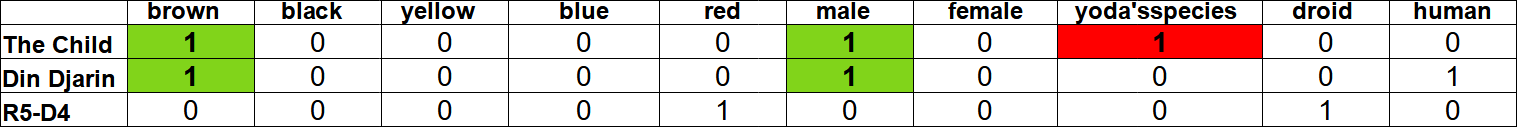

Con la llamada a la función [fit_transfom ](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)  estandarizamos el valor [4].

In [ ]:
from sklearn.feature_extraction.text import  CountVectorizer
count = CountVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
count_matrix = count.fit_transform(df['atributos'])

Visualizamos la dimensión de la matriz y verificamos que el número de "columnas" generadas es muy inferior a la generada con la descripción.

In [ ]:
count_matrix.shape


(1785, 468)

Calculamos la nueva matriz de distancias usando la métrica del coseno. Creamos una función para obtener la recomendación basada únicamente en las características. El proceso es similar al usado para recomendar usando el campo descripción.

In [ ]:
distance_matrix2= pairwise_distances(count_matrix,count_matrix ,metric='cosine')
def get_recommendationsByCaracteristicas(personaje):
  indexOfCharacter = df[df['name']==personaje].index.values[0]
  distance_scores = list(enumerate(distance_matrix2[indexOfCharacter]))
  ordered_scores = sorted(distance_scores, key=lambda x: x[1])
  top_scores = ordered_scores[1:11]
  top_indexes = [i[0] for i in top_scores]
  return df['name'].iloc[top_indexes]

Probamos el uso de la nueva función y vemos que los resultados difieren con las recomendaciones basadas en la descripción. Esto puede ser ocasionado por diversos motivos como que usamos pocas características o que las características usadas tienen poca importancia en el personaje. Observamos que ahora no aparece 'R5-D4' y Yoda está de número uno.

In [ ]:
get_recommendationsByCaracteristicas("The Child")

18                     Yoda
39            Quarsh Panaka
8         Biggs Darklighter
13                 Han Solo
20                Boba Fett
23         Lando Calrissian
27             Arvel Crynyd
28    Wicket Systri Warrick
47               Mace Windu
50                Eeth Koth
Name: name, dtype: object

In [ ]:
get_recomendacionByDescripcion("The Child")

87                       Din Djarin
7                             R5-D4
455                        Aunuanna
870                  Jonava Billane
18                             Yoda
20                        Boba Fett
965                        Cyl Sant
337    Voren Renstaal's Jedi Master
164           Vrook Lamar's Padawan
397            Kerra Holt's sibling
Name: name, dtype: object

Nuestro objetivo principal era realizar recomendaciones en base a la descripción y como objetivo secundario, que además tuvieramos en cuenta otras características del personaje. Para juntar estas dos recomendaciones decidimos sumar las dos matrices con los vectores de distancias, para obtener una matriz con las nuevas distancias (ambas matrices contienen valores estandarizados así que sumar las matrices es posible).

In [ ]:
distance_matrix3 = distance_matrix+ distance_matrix2

Creamos una nueva función que usa la suma de matrices para recomendar personajes

In [ ]:
def mezcla_recomendacion(personaje):
  indexOfCharacter = df[df['name']==personaje].index.values[0]
  distance_scores = list(enumerate(distance_matrix3[indexOfCharacter]))
  ordered_scores = sorted(distance_scores, key=lambda x: x[1])
  top_scores = ordered_scores[1:11]
  top_indexes = [i[0] for i in top_scores]
  return df['name'].iloc[top_indexes]


Comparamos las 3 funciones de recomendación vistas: en base a la descripción, en base a los atributos y mezcla de ambas.

In [ ]:
personaje="The Child"
print(get_recomendacionByDescripcion(personaje))
print()
print(get_recommendationsByCaracteristicas(personaje))
print()
print(mezcla_recomendacion(personaje))



87                       Din Djarin
7                             R5-D4
455                        Aunuanna
870                  Jonava Billane
18                             Yoda
20                        Boba Fett
965                        Cyl Sant
337    Voren Renstaal's Jedi Master
164           Vrook Lamar's Padawan
397            Kerra Holt's sibling
Name: name, dtype: object

18                     Yoda
39            Quarsh Panaka
8         Biggs Darklighter
13                 Han Solo
20                Boba Fett
23         Lando Calrissian
27             Arvel Crynyd
28    Wicket Systri Warrick
47               Mace Windu
50                Eeth Koth
Name: name, dtype: object

87             Din Djarin
18                   Yoda
39          Quarsh Panaka
20              Boba Fett
65             Jango Fett
63                  Dooku
13               Han Solo
64    Bail Prestor Organa
47             Mace Windu
50              Eeth Koth
Name: name, dtype: object


Podríamos seguir ajustando para que los resultados sean mejores. Por ejemplo añadir más características y atributos de los personajes como filiación(pertenencia a determinados grupos). También se puede ajustar el peso de cada una de las valoraciones. 

#SPRINT 4
En este sprint se desarrolló el sistema de valoración encargado de clasificar los comentarios que los fans de StarWars realizan sobre los personajes. 

## Carga de datos asociada al proceso de valoración
A la hora de buscar datasets con comentarios, ante la ausencia de uno de nuestra tamática de personajes de Star Wars, decidimos usar uno de comentarios de películas. 
Encontramos este de una [competición](https://www.kaggle.com/c/movie-review-sentiment-analysis-kernels-only) [5] en Kaggle que contenía más de 150.000 comentarios etiquetados. Las etiquetas que usa para los sentimientos asociadas a los comentarios son las siguientes:

> 0 - negativo

>1 - algo negativo

>2 - neutral

>3 - algo positivo

>4 - positivo

Tras entrenar usando este Dataset distintos modelos y ajustar los parámetros varias veces  llegamos a la conclusión de que no era el adecuado. Los score de los modelos se quedaban en el 70% de media. Además clasificaba bien los comentarios neutrales, pero era más difícil clasificar un comentario con una de las clases de los extremos (0- negativo o 4- positivo).


In [ ]:
#Cargamos desde nuestro repositorio de Github el archivo (en caso de no ternerlo ya)
carga_URL(url,"train.tsv")

Descargando :https://github.com/jmpenedo/abp_star_wars/raw/master/train.tsv
Descarga completa!


In [ ]:
import pandas as pd
primerDataset = pd.read_csv('train.tsv', delimiter='	')

In [ ]:
#Funcion que nos "pinta" la distribución de los sentimientos en una dataset
def dibuja(un_dataset,columna_agrupacion):
  import matplotlib.pyplot as plt
  from matplotlib.colors import ListedColormap
  import matplotlib.patches as mpatches
  import seaborn as sb
  %matplotlib inline
  plt.rcParams['figure.figsize'] = (16, 9)
  plt.style.use('ggplot')
  sb.set(color_codes=True)
  dist = un_dataset.groupby([columna_agrupacion]).size()
  fig, ax = plt.subplots(figsize=(12,8))
  sb.barplot(x=dist.keys(), y=dist.values);

Revisamos como están distribuídos los datos en este dataset. Vemos que más de la mitad de los comentarios están etiquetados como neutros.
Dibujamos la distribución de los etiquetas de los comentarios. Vemos que los datos siguen una distribución normal. Esta distribución de los datos condicionará el resultado del aprendizaje como pudimos comprobar. Los distintos modelos que entrenamos, en general clasificarán bien los comentarios neutros. En cambio es más dificil que un comentario sea clasficado con un 0 (negativo) o un 4 (positivo).

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64


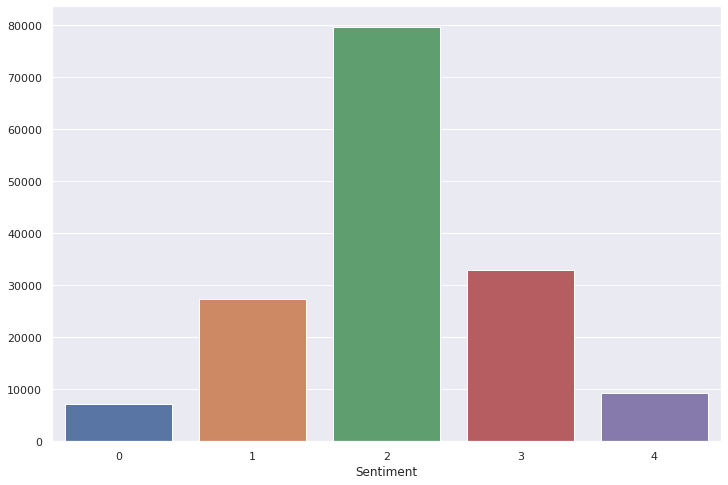

In [ ]:
print(primerDataset['Sentiment'].value_counts())
dibuja(primerDataset,'Sentiment')

Así que después de una semana trabajando con unos datos de entrenamiento, decidimos buscar otros mejores. Encontramos [IMDB Dataset of 50K Movie Reviews](https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews) [6]  que contiene 50.000 comentarios de películas exrtraídos de IMDB y etiquetados como positive y negative. 

Lo mejor de todo es su distribución, mitad de negativos y mitad de positivos. Tras hacer algunas pruebas de entrenamiento simples, conseguimos fácilmente scores de entorno al 90%. Así que decidimos usar este dataset para entrenar nuestros modelos. Posibles sentimientos:

*   Negative
*   Positive


In [ ]:
#Cargamos desde nuestro repositorio de Github el archivo (en caso de no ternerlo ya)
carga_URL(url,"IMDB Dataset.csv")

Descargando :https://github.com/jmpenedo/abp_star_wars/raw/master/IMDB%20Dataset.csv
Descarga completa!


negative    25000
positive    25000
Name: Sentiment, dtype: int64


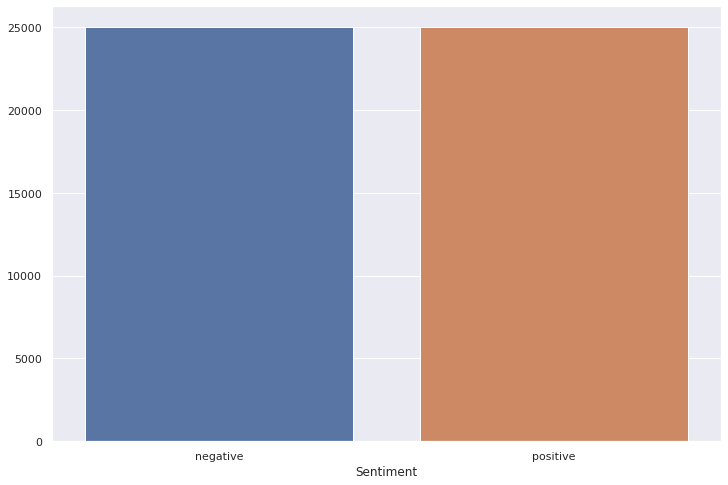

In [ ]:
import pandas as pd
segundoDataset = pd.read_csv('IMDB Dataset.csv')
segundoDataset = segundoDataset.rename(columns = {'sentiment': 'Sentiment'}, inplace = False)
print(segundoDataset['Sentiment'].value_counts())
dibuja(segundoDataset,'Sentiment')

### Preprocesamiento de los datos
Al igual que hicimos con las descripciones de los personajes en el sistema de recomendación, necesitmos preprocesar los datos de entrenamiento (comentarios) : 

- Divir el texto en palabras, lo que se conoce como ***tokenization***. Esto es necesario para poder realizar un procesado textual de forma estructurada.

- Elimiar las palabras que no aportan ningún sigificado, lo que en inglés se conoce como ***stopwords***.

- Como último paso, vamos a realizar un método que se conoce como ***stemmization***; con el que vamos a conseguir la raíz de cada palabra sin que el resultado sea una palabra real. De esta forma nos evitamos las variaciones de palabras que puedan afectar al sistema de recomendación.

Este proceso lo tendremos que usar más veces en nuestro sistema, así que creamos una función.

In [ ]:
# Funcion para preprocesar los datos
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
import nltk
nltk.download('punkt')
nltk.download('stopwords')

def preprocesar_dataset(un_dataset,col_index): 
   
  ps = PorterStemmer()
  preprocessedText = []
  
  for row in un_dataset.itertuples():
    text = word_tokenize(row[col_index]) ## indice de la columna que contiene el texto
    ## Remove stop words
    stops = set(stopwords.words("english"))
    text = [ps.stem(w) for w in text if not w in stops and w.isalnum()]
    text = " ".join(text)
    preprocessedText.append(text)
  
  preprocessed_dataset = un_dataset
  preprocessed_dataset['processed_text'] = preprocessedText

  return preprocessed_dataset

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Preprocesamos los comentarios

In [ ]:
preprocessedData = preprocesar_dataset(segundoDataset,1) #debemos indicar la columna en la que está el comentairo

Y visualizamos el resultado

In [ ]:
print(preprocessedData.head(5),preprocessedData.shape)

                                              review  ...                                     processed_text
0  One of the other reviewers has mentioned that ...  ...  one review mention watch 1 Oz episod hook they...
1  A wonderful little production. <br /><br />The...  ...  A wonder littl product br br the film techniqu...
2  I thought this was a wonderful way to spend ti...  ...  I thought wonder way spend time hot summer wee...
3  Basically there's a family where a little boy ...  ...  basic famili littl boy jake think zombi closet...
4  Petter Mattei's "Love in the Time of Money" is...  ...  petter mattei love time money visual stun film...

[5 rows x 3 columns] (50000, 3)


En este dataset las etiquetas de los sentimientos son 'negative' y 'positive'. Para poder usarlos es mejor que sean en formato numérico. Así que "codificamos" los negative como 0 y los positive como 1.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
preprocessedData['Sentiment']=le.fit_transform(preprocessedData['Sentiment'])
print(preprocessedData['Sentiment'].head(5))

0    1
1    1
2    1
3    0
4    1
Name: Sentiment, dtype: int64


In [ ]:
preprocessedData.to_csv ('preprocessedData.csv', index = False)


In [ ]:
import pandas as pd
preprocessedData = pd.read_csv('preprocessedData.csv')

### Hacer un split de los datos para entrenamiento y test:
De los comentarios que tenemos nos quedamos con el 90% para entrenamiento y el 10% para (validación y) [test ](https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/) [7].


In [ ]:
# split a dataset into train and test sets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
# split into train test sets
train, test = train_test_split(preprocessedData, test_size=0.10,random_state=1) #

Ahora tenemos 2 datasets: train con el 90% de los comentarios y test con el 10%

In [ ]:
print(train.shape, test.shape)

(45000, 3) (5000, 3)


## Proceso de aprendizaje supervisado (Train Val Test)
Para empezar es muy importante revisar como es la distribución de las etiquetas de los sentimientos. Vemos que es 50% para cada sentimiento. 

1    22534
0    22466
Name: Sentiment, dtype: int64


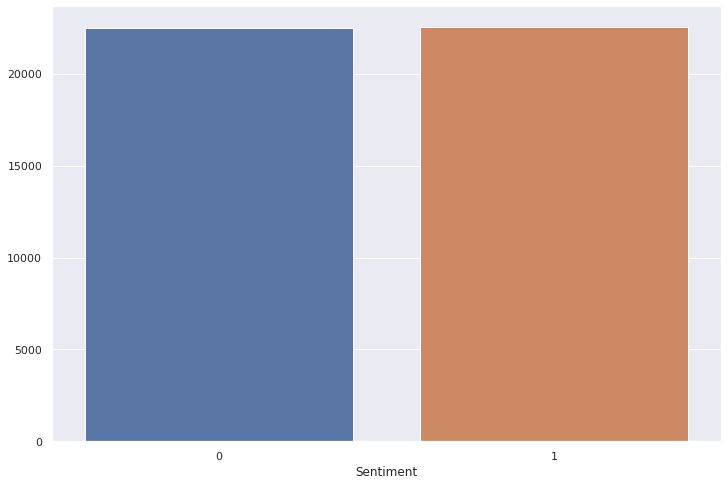

In [ ]:
print(train['Sentiment'].value_counts())
dibuja(train,'Sentiment')

### Creación de la bolsa de palabras
Necesitamos crear una bolsa de palabras que contenga las distintas palabras existentes en los comentarios que usaremos en el entrenamiento. Su creación es igual que en las recomendaciones de los personajes.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,  CountVectorizer

bagOfWordsModel = TfidfVectorizer(max_features=6000) #podemos usar max_features=6000 para reducir su tamaño
bagOfWordsModel.fit(train['processed_text'])
textsBoW= bagOfWordsModel.transform(train['processed_text'])



Muy importante. Hay que guardar el bagOfWordsModel junto el modelo entrenado para poder utilizarlo en prediciones futuras en nuestra aplicación

In [ ]:
import pickle
from datetime import datetime
pickle.dump(bagOfWordsModel, open("bagOfWordsModel-" + datetime.now().strftime("%Y%m%d%H%M") + ".pkl", "wb"))

Comprobamos que tenemos una bolsa de palabras con tantas filas (45.000) como comentarios y tantas columnas (más de 65900) como distintas palabras hay en los comentarios preprocesados.

En cada comentario (fila) para cada una de las palabras (columnas) se pondrá un valor ponderado para la ocurrencia de esa palabra en el comentario.

Con el primer dataset, que usamos para entrenar y que luego descartamos, la bolsa de palabras tenía 140.000 filas y 9800 columnas. Los comentarios que estamos usando ahora son más "ricos" en variedad de palabras.

El "Oxford English Dictionary" contiene entradas para  unas 171.476 palabras en uso... hay que tener en cuenta que en preprocesado eliminamos palabras que no aportan significado y hemos usado  **stemmization** para quedarnos con la raíz de las palabras. De acuerdo a diversos estudios la mayoría de los adultos nativo-hablantes en inglés usan entre unas 20.000 a 35.000 palabras.

Podemos concluir que nuestra bolsa de palabras cubrirá la mayor parte de las palabras de futuros comentarios que se añadan al sistema.

En sucesivas pruebas comprobamos que reduciendo el número de palabaras a las **6.000** más frecuentes presentes en los documentos, mejora la rapidez de los entrenamientos de los modelos y las prediciones sin apenas bajar el índice de acierto. 



In [ ]:
textsBoW.shape

(45000, 6000)

Para entrenar cualquiera de los modelos disponibles necesitamos pasarle dos parámetros básicos. X_train se corresponde con la bolsa de palabras (vectores que representan un comentario) e Y_train se corresponde de la clasificación que damos de ese comentario (0 negativo, 1 positivo).   

In [ ]:
X_train = textsBoW #Comentarios
Y_train = train['Sentiment'] #Etiquetas de los Comentarios


### Entrenamiento de un algoritmo de clasificación (SVM)
Creamos el modelo indicando que tendrá un kernel de tipo *linear*. Y comenzamos el entrenamiento pasándole los parámetros X_train e Y_train. Una vez comenzado el entrenamiento, con el dataset de 45.000 comentarios le lleva casi una hora. Para hacer alguna prueba inicial podemos usar un dataset más pequeño de, por ejemplo, 1.000 comentarios.

Más información de como funciona [SVM](https://scikit-learn.org/stable/modules/svm.html) [8].


In [ ]:
from sklearn import svm
svc = svm.SVC(kernel='linear')
svc.fit(X_train, Y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Una vez terminado el entrenamiento del modelo, es importante guardarlo junto a la correspondiente bolsa de palabaras que usamos para entrenarlo.

In [ ]:
import pickle
from datetime import datetime
# guardar el modelo en disco
with open('svc'+  datetime.now().strftime("%Y%m%d%H%M") +'.pkl','wb') as f:
    pickle.dump(svc,f)

Si queremos recuperar despues el modelo podemos hacerlo usando el siguiente código

In [ ]:
with open('IMDB-svc-202012072143.pkl', 'rb') as f:
    svc = pickle.load(f)
# Cargamos el bagOfwords del modelo previamente entrenado
with open('IMDB-bagOfWordsModel-202012072153.pkl', 'rb') as f:
    bagOfWordsModel = pickle.load(f)

### Carga y preprocesado de documentos de test
Revisamos la distribución de los datos para test. Comprobamos que están 50% para cada sentimiento. Así podemos verificar si el modelo clasifica bien para los dos tipos de sentimientos.


0    2534
1    2466
Name: Sentiment, dtype: int64


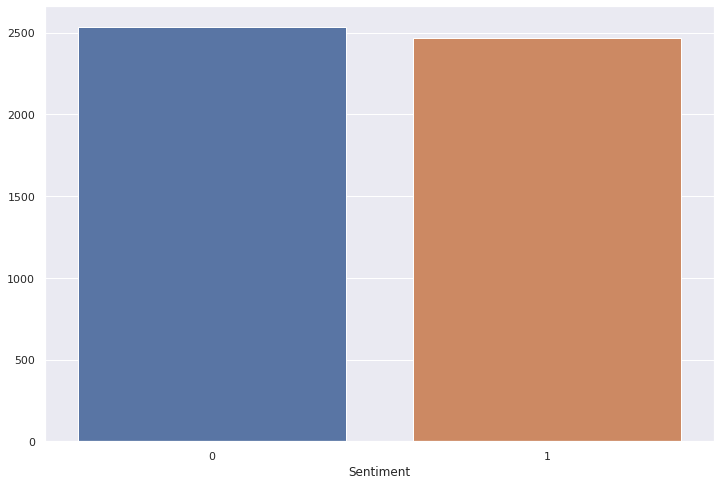

In [ ]:
print(test['Sentiment'].value_counts())
dibuja(test,'Sentiment')

Importante!: Se emplea la misma representación de bolsa de palabras que se ha usado para entrenar (bagOfWordsModel). 

Vamos convertir cada comentario que queremos testear en un array con 6.000 posiciones que se corresponden a cada una de las palabras con las que entrenamos el modelo. 

In [ ]:
textsBoWTest= bagOfWordsModel.transform(test['processed_text'])
textsBoWTest.shape

(5000, 6000)

Al igual que hicimos en el entrenamiento dividimos los datos de acuerdo a los parámetros de entrada X e Y. X_test se corresponde con los comentarios que queremos que el modelo claisfique e Y_Test se con la clasificación previa del comentario (0 negativo, 1 positivo) y le servirá para verificar si ha clasificado correctamte.

In [ ]:
X_test = textsBoWTest #Comentarios
Y_test = test['Sentiment'] #Etiquetas de los comentarios

### Clasificación de los documentos de test

Le decimos al modelo que nos clasifique los comentarios de test

In [ ]:
predictions = svc.predict(X_test) #Se almacena en el array predictions las predicciones del clasificador

### Evaluación de la predicción
Verificamos como ha sido esa predicción, comparando la clasificación dada por el sistema frente a la clasificación correcta.

In [ ]:
from sklearn.metrics import classification_report
print (classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      2534
           1       0.89      0.91      0.90      2466

    accuracy                           0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000



Este modelo nos da resultados buenos en testeo entorno al 0.90% de media. Revisando la documentación vemos que para datasets grandes (como el que usamos nosotros) también podemos usar otra implementación: **sklearn.svm.LinearSVC**

### Entrenamiento y Evaluación usando otros algoritmos
Vamos a probar con una variante de SVN con kernel RBF y otros modelos como el Logistic Regression, k-NN y Redes neuronales.

#### SVM con kernel RBF
Si usamos un kernel RBF  (Radial Basis Function) kernel, hay que pasarle dos parámetros: C y gamma. 

Primero cargamos los datos preprocesados. NO vamos a usar todos para la búsqueda de C y gamma apropiados. Usaremos sólo 1000 comentarios.

In [ ]:
#Cargamos desde nuestro repositorio de Github el archivo (en caso de no ternerlo ya)
carga_URL(url,"preprocessedData.csv")

Descargando :https://github.com/jmpenedo/abp_star_wars/raw/master/preprocessedData.csv
Descarga completa!


In [ ]:
import pandas as pd
DataRBF = pd.read_csv('preprocessedData.csv')
DataRBF = preprocessedData.head(1000)
bagOfWordsModel = TfidfVectorizer(max_features=6000)
bagOfWordsModel.fit(DataRBF['processed_text'])
textsBoWRBF= bagOfWordsModel.transform(DataRBF['processed_text'])
X_trainRBF = textsBoWRBF #Comentarios
Y_trainRBF = DataRBF['Sentiment'] #Etiquetas de los Comentarios

Existen métodos para buscar unos C y gamma adecuados como el siguiente donde le indicamos unos rangos de valores en los que buscar C y gamma. También haremos validación cruzada (que explicamos más adelante).

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
C_range = np.logspace(-2, 10, 13) #rango de valores en los que buscará C
gamma_range = np.logspace(-9, 3, 13) #rango de valores en los que buscará el gamma
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X_trainRBF, Y_trainRBF)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 10.0, 'gamma': 0.1} with a score of 0.81


Una vez que tenemos unos parámetros C y gamma adecuados, vamos entrenar nuestro SVM usando un kernel de tipo rbf.

In [ ]:
svcRBF = SVC(C=10, gamma=0.1, kernel='rbf')
svcRBF.fit(X_train, Y_train)
pred_y=lr.predict(X_test)


Resultados obtenidos 90% en fase de testeo 

In [ ]:
print (classification_report(Y_test, pred_y))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      2534
           1       0.88      0.91      0.90      2466

    accuracy                           0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000



In [ ]:
import pickle
from datetime import datetime
# guardar el modelo en disco
with open('grid'+  datetime.now().strftime("%Y%m%d%H%M") +'.pkl','wb') as f:
    pickle.dump(grid,f)

#### Logistic Regression
Es un tipo de [análisis de regresión](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc) [9] utilizado para predecir el resultado de una variable categórica (una variable que puede adoptar un número limitado de categorías) en función de las variables independientes o predictoras. Es útil para modelar la probabilidad de un evento ocurriendo como función de otros factores.

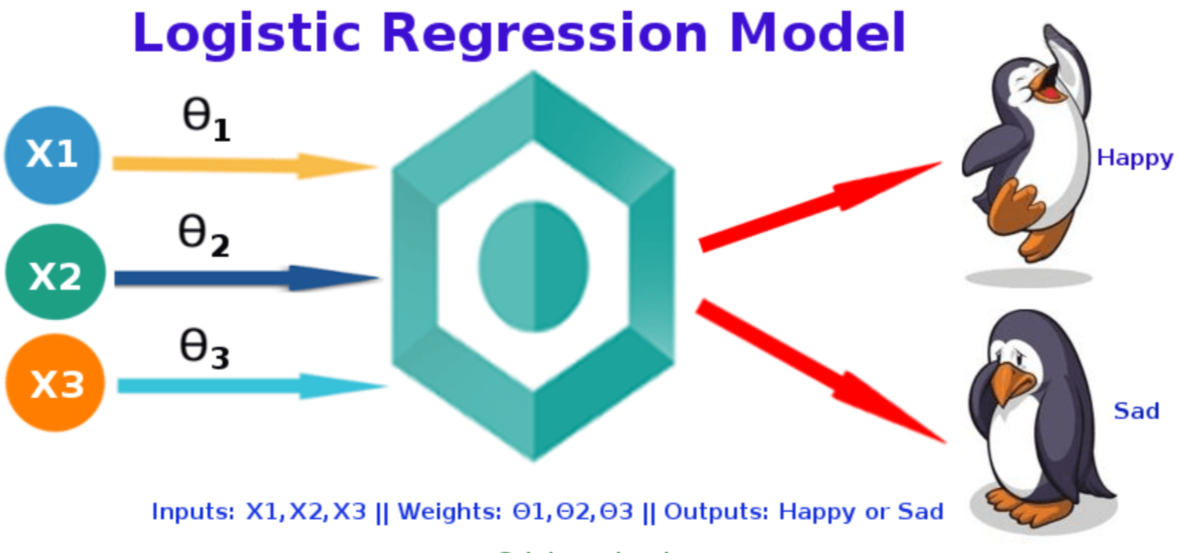

Nuestro proyecto trata de una clasificación bianaria (positivo/negativo), así que este modelo tiene que dar buenos resultados.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression()
lr.fit(X_train,Y_train)
pred_y=lr.predict(X_test)


Hemos obtenido un 89% de acierto de media, similar a los resultados obtenidos con SVM con kernel linear

In [ ]:
from sklearn.metrics import classification_report
print (classification_report(Y_test, pred_y))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      2534
           1       0.87      0.91      0.89      2466

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



In [ ]:
import pickle
# guardar el modelo en disco
with open('lr-'+  datetime.now().strftime("%Y%m%d%H%M") + '.pkl','wb') as f:
    pickle.dump(lr,f)

#### Algoritmo de clasificación: k-NN


 Este algorimmo clasifica el punto de interés basado en la mayoría de datos que le rodean. Primero calcula la distancia entre el item a clasificar y el resto de items del dataset de entrenamiento. Selecciona los “k” elementos más cercanos y  realizar una “votación de mayoría” entre los k puntos: [la mayoría decidirá su clasificación final](https://i.gal/ptxFF) [10] .

Lo fundamental es elegir un valor de k adecuado a nuestro problema. Así que lo que hicimos fue ir probando con k en el rango entre 1 y  29. Encontrando un valor bueno de k=23

([<matplotlib.axis.XTick at 0x7f605f0ec9b0>,
 <a list of 7 Text major ticklabel objects>)

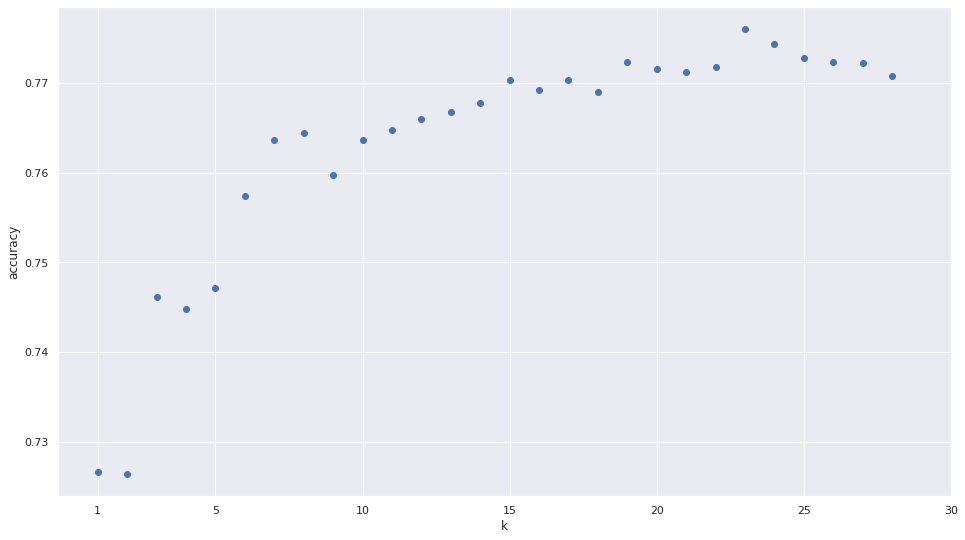

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
k_range = range(1, 29)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, Y_train)
    scores.append(knn.score(X_test, Y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([1,5,10,15,20,25,30])

Cómo vimos la mejor puntuación para nuestro dataset se da con el valor de k=23. Así que será el usemos para entrenar nuestro modelo.

In [ ]:
n_neighbors = 23
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='uniform')

Comprobamos los resultados obtenidos con k=23 es de un 78% en fase de testeo, un resultado peor que con SVM y Logistic Regression

In [ ]:
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.78      0.77      0.78      2534
           1       0.77      0.78      0.77      2466

    accuracy                           0.78      5000
   macro avg       0.78      0.78      0.78      5000
weighted avg       0.78      0.78      0.78      5000



In [ ]:
import pickle
from datetime import datetime
# guardar el modelo en disco
with open('knn_'+ n_neighbors '_' +  datetime.now().strftime("%Y%m%d%H%M") +'.pkl','wb') as f:
    pickle.dump(knn,f)

### Cross-Validation
Para intentar mejorar los resultados obtenidos se puede usar la validación cruzada. La validación cruzada divide los datos de entrada en k subconjuntos llamadas "folds". Se entrena el algoritmo con una partición y se valida con las siguientes, y así sucesivamente.
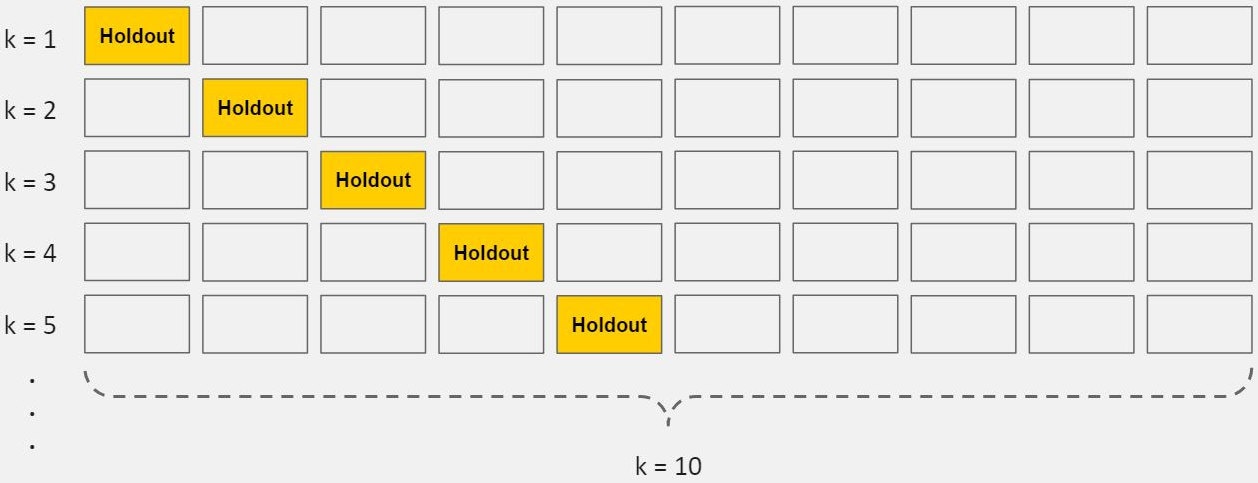

Este proceso se repetirá k veces, y en cada iteración se seleccionará un conjunto de prueba diferente, mientras los datos restantes se emplearán, como conjunto de entrenamiento. 

Una vez finalizadas las iteraciones, se calcula la precisión y el error para cada uno de los modelos producidos, y para obtener la precisión y el error final se calcula el promedio de los k modelos entrenados.

Una vez se cuenta con esta precisión promedio para un modelo, se puede repetir entonces el procedimiento del Cross Validation para todos los demás modelos de clasificación que se estén evaluando, y se seleccionará al final aquel que produzca el mejor valor de precisión y menor error promedio.

Primero vamos a ver el procedimiento con 10 Folds usando el modelo SVC visto previamente. Para ello recargamos los datos, sólo 5000 comentarios:

In [ ]:
#Cargamos desde nuestro repositorio de Github el archivo (en caso de no ternerlo ya)
carga_URL(url,"preprocessedData.csv")

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer,  CountVectorizer
Datasvc = pd.read_csv('preprocessedData.csv').head(5000)

In [ ]:
bagOfWordsModel = TfidfVectorizer(TfidfVectorizer(max_features=6000))
bagOfWordsModel.fit(Datasvc['processed_text'])
textsBoW= bagOfWordsModel.transform(Datasvc['processed_text'])
X_train = textsBoW #Comentarios
Y_train= Datasvc['Sentiment'] #Etiquetas de los Comentarios

Creamos el modelo que vamos a probar:

In [ ]:
from sklearn import svm
svc = svm.SVC(kernel='linear') 

Preparamos la validación cruzada indicando que haremos 10 subconjuntos o "folds". 

Ejecutamos el proceso de validación cruzada y conseguimos un acierto de 86,1%.

In [ ]:
from sklearn.svm import SVC
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = svc
# evaluate model
scores = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.861 (0.011)


Vamos a repetir esto para el resto de modelos, así podremos comparar y escoger el más apropiado para nuestro proyecto. Nos basamos en este [ejemplo](https://machinelearningmastery.com/how-to-configure-k-fold-cross-validation/) [11].

In [ ]:
# Librerias necesarias
from numpy import mean
from numpy import isnan
from numpy import asarray
from numpy import polyfit
from scipy.stats import pearsonr
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

Estos son los modelos que vamos a comparar para ver cual se adapata mejor y da unos resultados mejores para nuestro proyecto.

In [ ]:
def get_models():
	models = list()
	models.append(LogisticRegression())
	models.append(RidgeClassifier())
	models.append(SGDClassifier())
	models.append(PassiveAggressiveClassifier())
	models.append(KNeighborsClassifier())
	models.append(DecisionTreeClassifier())
	models.append(ExtraTreeClassifier())
	models.append(LinearSVC())
	models.append(SVC())
	models.append(GaussianNB())
	models.append(AdaBoostClassifier())
	models.append(BaggingClassifier())
	models.append(RandomForestClassifier())
	models.append(ExtraTreesClassifier())
	models.append(GaussianProcessClassifier())
	models.append(GradientBoostingClassifier())
	models.append(LinearDiscriminantAnalysis())
	models.append(QuadraticDiscriminantAnalysis())
	return models

La siguiente función se encarga de hacer la validación cruzada de un modelo pasado por parámetro. Además se le pasan los datos de cómo será esa validación cruzada.

In [ ]:
# evaluate the model using a given test condition
def evaluate_model(cv, model):
	# get the dataset
  X = X_train
  y = Y_train
	# evaluate the model
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  # return scores
  return mean(scores)

Vamos a comparar Cross Validation con K=10 con [Leave-One-Out Cross-Validation (LOOCV)](https://towardsdatascience.com/what-is-cross-validation-622d5a962231) [12].
Para el siguiente escenario, por temas de rendimiento, se han usado sólo 1.000 comentarios con 6.000 palabras.
En varias pruebas que hicimos con más datos, **Google nos cortó el grifo de uso de GPUs** y TPUs durante unos días por "gastar" demasiados recursos. Nuestro objetivo en este punto no es entrenar todos los modelos con los datos disponibles, sino darnos una pista de cual de ellos acertará mejor a la hora de clasificar comentarios y así ayudarnos a escoger el modelo que entrenaremos finalmente.

>LogisticRegression: ideal=0.804, cv=0.805
>RidgeClassifier: ideal=0.815, cv=0.808
>SGDClassifier: ideal=0.804, cv=0.807
>PassiveAggressiveClassifier: ideal=0.810, cv=0.807
>KNeighborsClassifier: ideal=0.650, cv=0.651
>DecisionTreeClassifier: ideal=0.671, cv=0.678
>ExtraTreeClassifier: ideal=0.613, cv=0.619
>LinearSVC: ideal=0.815, cv=0.810
>SVC: ideal=0.807, cv=0.805
>AdaBoostClassifier: ideal=0.742, cv=0.764
>BaggingClassifier: ideal=0.752, cv=0.725
>RandomForestClassifier: ideal=0.782, cv=0.790
>ExtraTreesClassifier: ideal=0.804, cv=0.807
>GradientBoostingClassifier: ideal=0.775, cv=0.775
Correlation: 0.988


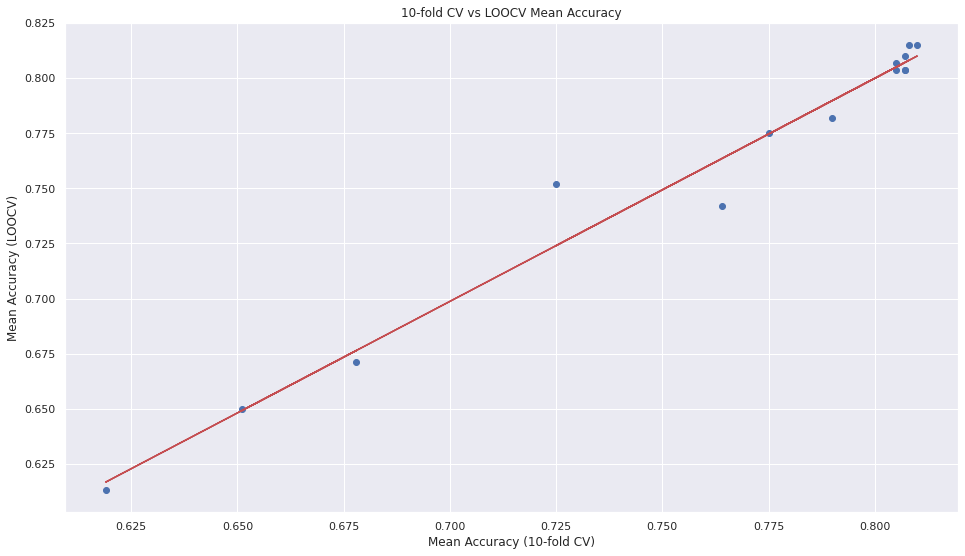

In [ ]:
# define test conditions
ideal_cv = LeaveOneOut()
cv = KFold(n_splits=10, shuffle=True, random_state=1)
# get the list of models to consider
models = get_models()
# collect results
ideal_results, cv_results = list(), list()
# evaluate each model
for model in models:
  	# evaluate model using each test condition
  cv_mean = evaluate_model(cv, model)
  ideal_mean = evaluate_model(ideal_cv, model)
  # check for invalid results
  if isnan(cv_mean) or isnan(ideal_mean):
    continue
	# store results
  cv_results.append(cv_mean)
  ideal_results.append(ideal_mean)
	# summarize progress
  print('>%s: ideal=%.3f, cv=%.3f' % (type(model).__name__, ideal_mean, cv_mean))
 # calculate the correlation between each test condition
corr, _ = pearsonr(cv_results, ideal_results)
print('Correlation: %.3f' % corr)
# scatter plot of results
pyplot.scatter(cv_results, ideal_results)
# plot the line of best fit
coeff, bias = polyfit(cv_results, ideal_results, 1)
line = coeff * asarray(cv_results) + bias
pyplot.plot(cv_results, line, color='r')
# label the plot
pyplot.title('10-fold CV vs LOOCV Mean Accuracy')
pyplot.xlabel('Mean Accuracy (10-fold CV)')
pyplot.ylabel('Mean Accuracy (LOOCV)')
# show the plot
pyplot.show()

Vemos que el modelo SVC con kernel de tipo "Linear" es el que mejores resultados obtiene, así que será el que usemos para nuestro proyecto. Nos queda por ver un modelo de redes neuronales para comparar resultados.

### Redes neuronales

Los modelos de redes neuronales son más complejos de configurar que los anteriores y necesitan ser tratados a parte para ver su precisión antes de de decantarnos por un modelo para nuestro proyecto. Recargamos los datos para el entrenamiento.

In [ ]:
#Cargamos desde nuestro repositorio de Github el archivo (en caso de no ternerlo ya)
carga_URL(url,"preprocessedData.csv")

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer,  CountVectorizer
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
PreRN = pd.read_csv('preprocessedData.csv')
PreRN = PreRN.head(5000) #para no quedarnos sin RAM...
trainRN, testRN = train_test_split(PreRN, test_size=0.10,random_state=1) 
bagOfWordsModel = TfidfVectorizer()
bagOfWordsModel.fit(trainRN['processed_text'])
textsBoW= bagOfWordsModel.transform(trainRN['processed_text'])
X_train= textsBoW #Comentarios
Y_train= trainRN['Sentiment'] #Etiquetas de los Comentarios
textsBoWTest= bagOfWordsModel.transform(testRN['processed_text'])
X_test = textsBoWTest #Documentos
Y_test = testRN['Sentiment'] #Etiquetas reales de los documentos

El primer paso es configurar como será nuestro modelo de red neuronal. Necesitams una capa de entrada que tendrá tantas neuronas como distintas palabras hay en nuestra bolsa de palabras. Luego tantas capas intermedias "ocultas" como consideremos necesarias y por último la capa de salida donde se realiza la clasificación. Debemos indicar el tipo de función que ejecutarán las neuronas de las capas ocultas y las de la capa de salida: [Sigmoid, Relu, etc.](https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6) [16]

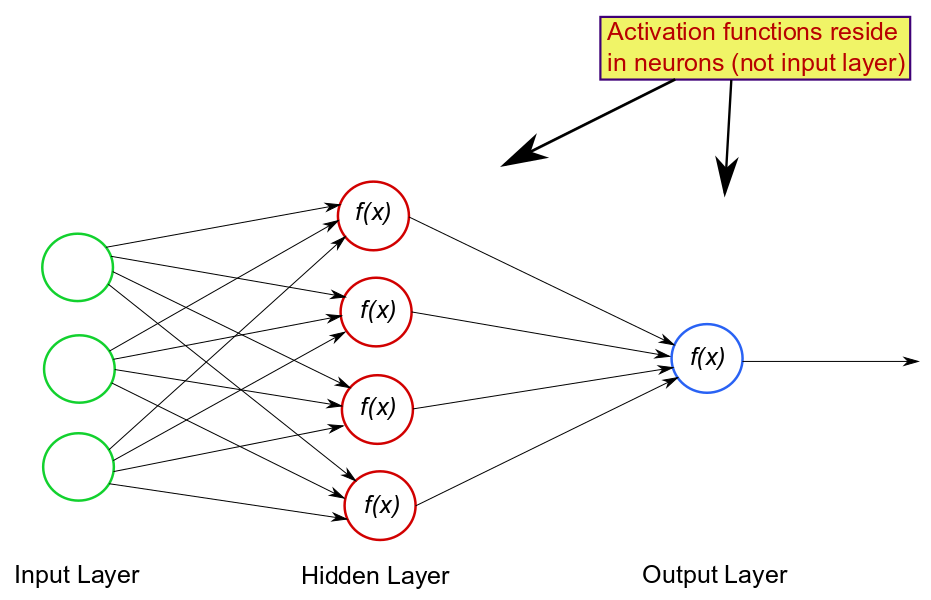


In [ ]:
#Configuracion del modelo de red neuronal 
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
model = Sequential()
# Input - Layer
model.add(Dense(50, activation = "relu", input_shape=(X_train.shape[1], )))
# Hidden - Layers
model.add(Dropout(0.3, noise_shape=None, seed=None))
model.add(Dense(50, activation = "relu"))
model.add(Dropout(0.2, noise_shape=None, seed=None))
model.add(Dense(50, activation = "relu"))
# Output- Layer
model.add(Dense(1, activation = "sigmoid")) 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                2227050   
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 2,232,201
Trainable params: 2,232,201
Non-trainable params: 0
______________________________________________

Para compilar el modelo indicaremos [binary_crossentropy](https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/binary-crossentropy) [13] dado que la clasificación final será binaria (0 o 1, positivo o negativo).

Como optimizador usamos [rmsprop](https://towardsdatascience.com/understanding-rmsprop-faster-neural-network-learning-62e116fcf29a) [14].

Y la métrica para entrenar será "accuracy" o precisión.

In [ ]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Los datos que proporcionamos a la red neuronal deben ser arrays (en caso contrario se produce un fallo en la carga). Hay que tener cuidado de no agotar la memoria RAM del sistema en esta operación. Así que en la carga de datos anterior limitamos la entrada a 20.000 comentarios. En el entorno de Colab, Google nos proporciona unos **12 GB de RAM** que se pueden agotar rápidamente si cargamos todos los datos en un array.

In [ ]:
#preparamos las entradas de datos para el modelo. Tienen que ser arrays, para evitar el error nvalidArgumentError:  is out of order. Many sparse ops require sorted indices. Use `tf.sparse.reorder` to create a correctly ordered copy.
#ojo, hay que limitar el número de filas que usamos del dataset para evitar quedarnos sin memoria RAM
X_train = X_train.toarray()
Y_train = Y_train
X_test = X_test.toarray()
Y_test = Y_test

Entrenamos el modelo y luego realizamos la evaluación.
Es importante usar parámetros adecuados de [epochs y batch_size](https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9) [15]. 

In [ ]:
model.fit(X_train,Y_train, epochs=25, batch_size=64)
model.evaluate(x=X_test, y=Y_test, batch_size=64, verbose=1, sample_weight=None)

Epoch 1/25
282/282 [==============================] - 11s 38ms/step - loss: 0.3737 - accuracy: 0.8428
Epoch 2/25
282/282 [==============================] - 11s 38ms/step - loss: 0.1858 - accuracy: 0.9298
Epoch 3/25
282/282 [==============================] - 11s 38ms/step - loss: 0.1309 - accuracy: 0.9537
Epoch 4/25
282/282 [==============================] - 11s 39ms/step - loss: 0.1016 - accuracy: 0.9657
Epoch 5/25
282/282 [==============================] - 11s 40ms/step - loss: 0.0799 - accuracy: 0.9724
Epoch 6/25
282/282 [==============================] - 11s 39ms/step - loss: 0.0659 - accuracy: 0.9787
Epoch 7/25
282/282 [==============================] - 11s 39ms/step - loss: 0.0556 - accuracy: 0.9817
Epoch 8/25
282/282 [==============================] - 11s 39ms/step - loss: 0.0448 - accuracy: 0.9868
Epoch 9/25
282/282 [==============================] - 11s 39ms/step - loss: 0.0389 - accuracy: 0.9886
Epoch 10/25
282/282 [==============================] - 11s 39ms/step - loss: 0.034

[1.6399776935577393, 0.8510000109672546]

Nuestra red neuronal ha coneguido un 86.4 % de acierto.

Salvamos el modelo para futuras prediciones. La forma de hacerlo es distinta a la usada para los otros modelos.

In [ ]:
# save the model to disk
model.save('modeloRN_entrenado')


Recargar modelo entrenado

In [ ]:
from tensorflow import keras
# Recrea exactamente el mismo modelo solo desde el archivo
modelRn = keras.models.load_model('modeloRN_entrenado')

## Probando hacer prediciones

Depués de entrenar diversos modelos, ya tenemos algunos que nos dan buenos resultados para nuestro dataset. Así que para simplificar el proceso de hacer comentarios definimos una función que realiza una clasificación de un comentario como negativo (0) o positivo (1). Los parámetros que se pasan son el modelo entrenado, la bolsa de palabras que se usó para entrenar el modelo y el comentario que se quiere clasificar.

Finalmente el modelo que usamos será un **SVM con kernel** linear que conseguimos que en fase de testeo llegará al **95% de acierto** (usando 65900 palabras para la bolsa y todos los comentarios).

In [ ]:
def hacer_predicion(elmodelo,bolsaPalabras,unComentario):
  lista_comentarios =  pd.DataFrame({'Comentarios':[unComentario]})
  lista_comentarios = preprocesar_dataset(lista_comentarios,1)
  X_input= bolsaPalabras.transform(lista_comentarios['processed_text']) ##hay que usar la misma bolsa de palabras que pars train
  pred = elmodelo.predict(X_input)
  return(pred[0])

Debemos cargar el modelo y la bolsa de palabras antes de poder hacer prediciones.

Este modelo svc con kernel linear dio un acierto de cerca del **95%** en la fase de test.

In [ ]:
#Cargamos desde nuestro repositorio de Github el archivo (en caso de no ternerlo ya)
carga_URL(url,"IMDB-svc-202012072143.pkl")
carga_URL(url,"IMDB-bagOfWordsModel-202012072153.pkl")

In [ ]:
# Cargamos el modelo previamente entrenado
with open('svc-202012061438.pkl', 'rb') as f:
    elModelo = pickle.load(f)
# Cargamos el bagOfwords del modelo previamente entrenado
with open('bagOfWordsModel-202012061438.pkl', 'rb') as f:
    laBagOfwords = pickle.load(f)
  

Probamos la función con un comentario negativo y uno positivo sobre personajes de Star Wars

In [ ]:
comentario_negativo = "Jar Jar is the worst. I hate it. Superfluous sequel: bad, fatal, waste dumb makes no sense is a disaster, seriously bad  poo incessant whining is a just a waste an inexplicable nightmare"
comentario_positivo = "I love Yoda so much, he is the best, so sweet and cute. It is sensational and enormously fun "
print(hacer_predicion(elModelo,laBagOfwords,comentario_negativo))
print(hacer_predicion(elModelo,laBagOfwords,comentario_positivo))


0
1


## Valorar de forma manual un item

#### Importamos CRUD de usuario manual

Ahora vamos con la valoración manual. Para ello usamos un nuevo dataset.

In [ ]:
#Cargamos desde nuestro repositorio de Github el archivo (en caso de no ternerlo ya)
carga_URL(url,"CRUD_users_manual.csv")

Descargando :https://github.com/jmpenedo/abp_star_wars/raw/master/CRUD_users_manual.csv
Descarga completa!


In [ ]:
import pandas as pd
commentsData = pd.read_csv('CRUD_users_manual.csv')
commentsData

,id_user,name_character,comment,sentiment,like_dislike
0,pepe,C-3PO,"I have never liked this robot, he is so bland.",0,NaN
1,juan,R2-D2,I dont like him,0,NaN
2,luis,Darth Vader,This is the antagonist of the series. I love him.,1,NaN


#### Formulario para valorar sobre un personaje de forma manual

Para demostrar su uso, vamos a crear un formulario para añadir un comentario nuevo al dataset que se acaba de cargar.

In [ ]:
##@title Personaje a valorar

# Usuario que va a valorar al personaje.
usuario = 'dsteve' #@param {type:"string"}

# Nombre del personaje a valorar.
nombre = 'C-3PO' #@param {type:"string"}

# Mostramos comentario del usuario sobre el personaje.
comentario = 'He is so cute and chill.' #@param {type:"string"}

# Valoración positiva o negativa.
valoracion = "Positiva" #@param ["Positiva", "Negativa"]

# Añadimos dicha información de forma manual al CRUD dependiendo de la valoración
if valoracion == "Positiva":
  apped_row = {'id_user':usuario,'name_character':nombre,'comment':comentario,'sentiment' : "NaN", 'like_dislike' : valoracion}
  commentsData=commentsData.append(apped_row,ignore_index=True,sort=False)
elif valoracion == "Negativa":
  apped_row = {'id_user':usuario,'name_character':nombre,'comment':comentario,'sentiment' : "NaN", 'like_dislike' : valoracion}
  commentsData=commentsData.append(apped_row,ignore_index=True,sort=False)

# Mostramos que se ha añadido al dataset  
commentsData


,id_user,name_character,comment,sentiment,like_dislike
0,pepe,C-3PO,"I have never liked this robot, he is so bland.",0,NaN
1,juan,R2-D2,I dont like him,0,NaN
2,luis,Darth Vader,This is the antagonist of the series. I love him.,1,NaN
3,dsteve,C-3PO,He is so cute and chill.,NaN,Positiva


Como podemos observar se ha añadido un nuevo comentario, pero el campo sentiment está NaN, ya que esa es la parte correspondiente al sistema de valoración automática.

## CRUD

En este apartado vamos a hacer un pequeño CRUD donde los usuarios van comentar que les parece cada personaje. Para simplificar se va a subir un dataset ya con los comentarios de los usuarios a los personajes.

In [ ]:
#Cargamos desde nuestro repositorio de Github el archivo (en caso de no ternerlo ya)
carga_URL(url,"CRUD_users.csv")

Descargando :https://github.com/jmpenedo/abp_star_wars/raw/master/CRUD_users.csv
Descarga completa!


In [ ]:
import pandas as pd
commentsData = pd.read_csv('CRUD_users.csv')
commentsData

,id_user,name_character,comment,sentiment,like_dislike
0,raul,Luke Skywalker,I really like luke he was great at the return ...,NaN,NaN
1,raul,Darth Vader,Vader is a bastard how can he do those things?!,NaN,NaN
2,joseM,Jar Jar Binks,This character is heavy I did not like it at a...,NaN,NaN
3,joseM,The Child,I love!!!! I love it!!! it's super cute!!!!,NaN,NaN
4,jesus,BB8,I liked BB8 it's the new r2-d2,NaN,NaN
5,jesus,C-3PO,C3PO is super dumb makes the movie more boring,NaN,NaN
6,dgzlopes,C-3PO,Well I do like C3PO,NaN,NaN
7,dgzlopes,R2-D2,I never liked this character,NaN,NaN


Ahora vamos a añadir una fila más al dataset.

In [ ]:
apped_row = {'id_user':"dgzlopes",'name_character':"Leia Organa",'comment':"This character is incredibly well built, he has a lot of charisma!",'sentiment' : "NaN", 'like_dislike' : "NaN"}
commentsData=commentsData.append(apped_row,ignore_index=True,sort=False)
commentsData

,id_user,name_character,comment,sentiment,like_dislike
0,raul,Luke Skywalker,I really like luke he was great at the return ...,NaN,NaN
1,raul,Darth Vader,Vader is a bastard how can he do those things?!,NaN,NaN
2,joseM,Jar Jar Binks,This character is heavy I did not like it at a...,NaN,NaN
3,joseM,The Child,I love!!!! I love it!!! it's super cute!!!!,NaN,NaN
4,jesus,BB8,I liked BB8 it's the new r2-d2,NaN,NaN
5,jesus,C-3PO,C3PO is super dumb makes the movie more boring,NaN,NaN
6,dgzlopes,C-3PO,Well I do like C3PO,NaN,NaN
7,dgzlopes,R2-D2,I never liked this character,NaN,NaN
8,dgzlopes,Leia Organa,"This character is incredibly well built, he ha...",NaN,NaN


## Valorar de forma automática un item

Prerequisitos, deben estar definidas las funciones:  
1.   preprocesar_dataset
2.   hacer_predicion

Cargamos el modelo ya entrenado que vamos usar para clasificar el comentario.


In [ ]:
#Cargamos desde nuestro repositorio de Github el archivo (en caso de no ternerlo ya)
carga_URL(url,"IMDB-svc-202012072143.pkl")
carga_URL(url,"IMDB-bagOfWordsModel-202012072153.pkl")

Descargando :https://github.com/jmpenedo/abp_star_wars/raw/master/IMDB-svc-202012072143.pkl
Descarga completa!
Descargando :https://github.com/jmpenedo/abp_star_wars/raw/master/IMDB-bagOfWordsModel-202012072153.pkl
Descarga completa!


In [ ]:
import pickle
with open('IMDB-svc-202012072143.pkl', 'rb') as f:
    elModelo = pickle.load(f)
# Cargamos el bagOfwords del modelo previamente entrenado
with open('IMDB-bagOfWordsModel-202012072153.pkl', 'rb') as f:
    laBagOfwords = pickle.load(f)

Recorremos el dataset de comentarios clasificando los comentarios

In [ ]:

for index, row in commentsData.iterrows():
  row['sentiment'] = hacer_predicion(elModelo,laBagOfwords,row['comment'])
     
     


Visualizamos el resultado de la clasificación

In [ ]:
commentsData

,id_user,name_character,comment,sentiment,like_dislike
0,raul,Luke Skywalker,I really like luke he was great at the return ...,1,NaN
1,raul,Darth Vader,Vader is a bastard how can he do those things?!,0,NaN
2,joseM,Jar Jar Binks,This character is heavy I did not like it at a...,0,NaN
3,joseM,The Child,I love!!!! I love it!!! it's super cute!!!!,1,NaN
4,jesus,BB8,I liked BB8 it's the new r2-d2,1,NaN
5,jesus,C-3PO,C3PO is super dumb makes the movie more boring,0,NaN
6,dgzlopes,C-3PO,Well I do like C3PO,1,NaN
7,dgzlopes,R2-D2,I never liked this character,0,NaN
8,dgzlopes,Leia Organa,"This character is incredibly well built, he ha...",1,NaN


#Bibliografía y recursos

## Bibliografía
[1] Wookieepedia ,  [Online] Available [https://i.gal/w0aaS](https://i.gal/w0aaS)

[2] Scikit-learn. Valid metrics for pairwise_distances,  [Online] Available [https://i.gal/UHBWu](https://i.gal/UHBWu)

[3] K. Gohrani (2019, nov 10). Different Types of Distance Metrics used in Machine Learning,  [Online] Available [https://i.gal/M78sI](https://i.gal/M78sI)

[4] Scikit-learn. Standardize features by removing the mean and scaling to unit variance,  [Online] Available [https://i.gal/Khwia](https://i.gal/Khwia)

[5] Kaggle. Movie Review Sentiment Analysis (Kernels Only). Classify the sentiment of sentences from the Rotten Tomatoes dataset,  [Online] Available [https://i.gal/setVS](https://i.gal/setVS)

[6] Kaggle. IMDB Dataset of 50K Movie Reviews
Large Movie Review Dataset,  [Online] Available [https://i.gal/PtfPx](https://i.gal/PtfPx)

[7] J. Brownlee (2020, jul 24). Train-Test Split for Evaluating Machine Learning Algorithms,  [Online] Available [https://i.gal/cOWvJ](https://i.gal/cOWvJ)

[8] Scikit-learn. Support Vector Machines,  [Online] Available [https://i.gal/FuFbJ](https://i.gal/FuFbJ)

[9] S. Swaminathan
 (2018, mar 15). Logistic Regression — Detailed Overview,  [Online] Available [https://i.gal/EkdQJ](https://i.gal/EkdQJ)

[10] J.I. Bagnato (2018, jul 10). Clasificar con K-Nearest-Neighbor ejemplo en Python,  [Online] Available [https://i.gal/ptxFF](https://i.gal/ptxFF)

[11] J. Brownlee (2020, aug 26). How to Configure k-Fold Cross-Validation,  [Online] Available [https://i.gal/CriWc](https://i.gal/CriWc)

[12] S. Aggarwal (2020, jun 15). What is Cross-Validation?
Also, what are the LOOCV and k-Fold Cross-Validation techniques?,  [Online] Available [https://i.gal/MidpX](https://i.gal/MidpX)


[13] Peltarion. Binary crossentropy,  [Online] Available [https://i.gal/UHgxo](https://i.gal/UHgxo)

[14] V. Bushaevl (2018, sep 2). Understanding RMSprop — faster neural network learning,  [Online] Available [https://i.gal/OMB5E](https://i.gal/OMB5E)

[15] S. Sharma (2017, sep 23).Epoch vs Batch Size vs Iterations,  [Online] Available [https://i.gal/70LpI](https://i.gal/70LpI)

[16] S. Sharma (2017, sep 6). Activation Functions in Neural Networks: Sigmoid, tanh, Softmax, ReLU, Leaky ReLU explained!,  [Online] Available [https://i.gal/BEkbe](https://i.gal/BEkbe)


##Recursos

Todos los ficheros (archivos cvs, xml y pkl) que utilizamos en el proyecto están disponibles en este repositorio de Github:

[17] https://github.com/jmpenedo/abp_star_wars


